# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

A neuron computes a linear function (z = Wx + b) followed by an activation function.

####  2. Why we use non-linear activation funcitons in neural networks?

When use linear activation functions, several hidden layers are equal to only one hidden layer.

#### 3. What is the 'Logistic Loss' ?

**Cross-entropy:** <br>
p(x) and q(x) are probability distribution<br>
$H(p,q) = -\sum_{x} p(x)logq(x)$

**Logistic Loss:**<br>
$H(p,q) = -\sum_{x} p(x)logq(x) = -ylog\hat{y}-(1-y)log(1-\hat{y})$

**Logistic Loss is a special case (binary classification) of Cross-entropy.**

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

选C ： 输出为0~1之间的值，表示含有猫的概率

#### 5. Why we don't use zero initialization for all parameters ?

With forward propagation and backpropagation the output of all neurons is the same, which leads to the function of all neurons is the same and the gradient is not transferred.

#### 6. Can you implement the softmax function using python ? 

$$S_{i} = \frac{e^{V_{i}}}{\sum_{j} e^{V_{j}}}$$

<font color='red'>softmax 最好每一项减去最大值，防止出现数值上溢，并且可以尝试使用numpy完成<font>

**证明softmax(x)=softmax(x+c),其中c为常数**<br>
\begin{align}
(softmax(x+c))_i &= \frac{exp(x_i+C)}{\sum_{j=1}^{dim(x)} exp(x_{j}+c)}\\ &= \frac{exp(x_{i})exp(c)}{\sum_{j=1}^{dim(x)}exp(x_j+c)}\\ &=\frac{exp(x_{i})exp(c)}{exp(c)\sum_{j=1}^{dim(x)}exp(x_{i})} \\&=\frac{exp(x_{i})}{\sum_{j=1}^{dim(x)}exp(x_{i})} = softmax(x)
\end{align}

In [3]:
import numpy as np
def softmax(x):
    """
    Compute the softmax of x
    Arguments: x -- a list represented a vector
    Returns:
    z -- a numpy array represented the softmax of x
    """
    x_max = np.max(x)
    x=x-x_max
    s= np.exp(x)/np.sum(np.exp(x))
    return s


In [4]:
x = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
print(type(x))
softmax(x)

<class 'list'>


array([0.02364054, 0.06426166, 0.1746813 , 0.474833  , 0.02364054,
       0.06426166, 0.1746813 ])

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

#### 2 - Overview of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [6]:
# Loading the data 
digits = datasets.load_digits()

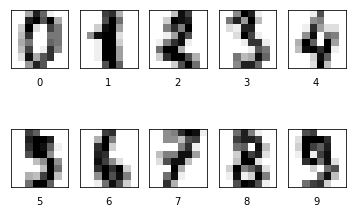

In [7]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [9]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

In [11]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [12]:
import numpy as np
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1./(1+np.exp(-z))
    
    return s

In [13]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [14]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim,1)
    b = 0.
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [15]:
initialize_parameters(14)

(array([[-1.18485402],
        [ 1.11388273],
        [ 0.55700903],
        [-1.50230822],
        [ 0.08062483],
        [-0.07398026],
        [ 0.77279631],
        [-0.68092107],
        [-0.12770616],
        [ 2.49926635],
        [ 0.96269124],
        [-0.94850486],
        [-0.30214681],
        [ 2.03616984]]), 0.0)

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)})$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [16]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    #print('w:',w)
    m = X.shape[0] #样本数量
    A = sigmoid(np.dot(X,w)+b)
    #print('A.shape:',A.shape)
    #cost = -np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m #按公式这样写，但cost会出现nan的情况
    #Reference:https://blog.csdn.net/pan5431333/article/details/77606581
    cost = -np.sum(Y*np.log(A+ pow(10.0, -9))+(1-Y)*np.log(1-A+ pow(10.0, -9)))/m
    #print('cost',cost)
    dw = (1/m)*np.dot(X.T,A-Y) #(64,1)
    #print('dw.shape:',dw.shape)
    #print('dw:',dw)
    db = np.mean(A-Y)
    #print('db:',db)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [17]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [19]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[1],1)
    
    A = sigmoid(np.dot(X,w)+b)
    """
    for i in range(Y_prediction.shape[1]):
        if A[i] >= 0.5:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
    """
    #对模型输出的概率值使用阈值转换成0和1可以使用 numpy.where完成，不需要使用循环
    Y_prediction = np.where(A>=0.5,1,0)
    Y_prediction = np.array([int(x) for x in Y_prediction]).reshape(1,m)
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [25]:
from sklearn.utils import shuffle,resample
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost=True):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    #preprocessing
    Y_train = Y_train.reshape(-1,1) #size(m,1)
    Y_test = Y_test.reshape(-1,1)
    #parameters initialization
    row,col = X_train.shape
    w,b = initialize_parameters(col)
    #training
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    #train_accuracy
    Y_train_predict = predict(params['w'], params['b'], X_train)
    n = sum(Y_train_predict.T==Y_train)
    train_acc = float(n/Y_train.shape[0])
    #test_accuracy
    Y_test_predict = predict(params['w'], params['b'], X_test)
    n = sum(Y_test_predict.T==Y_test)
    test_acc = float(n/Y_test.shape[0])
    #print("train_acc={:.4f},test_accuracy={:.4f}".format(train_acc,test_acc))
    #results
    result = {
        "costs":costs,
        "lr":learning_rate,
        "num_itr":num_iterations,
        "tr_acc":train_acc,
        "te_acc":test_acc
    }
    return result

In [26]:
model(X_train, y_train, X_test, y_test, num_iterations=5000, learning_rate=0.001,print_cost=True)

Cost after iteration 0: 9.123356
Cost after iteration 100: 8.591006
Cost after iteration 200: 8.122972
Cost after iteration 300: 7.617530
Cost after iteration 400: 7.116358
Cost after iteration 500: 6.608261
Cost after iteration 600: 6.133836
Cost after iteration 700: 5.695178
Cost after iteration 800: 5.293786
Cost after iteration 900: 4.924673
Cost after iteration 1000: 4.571650
Cost after iteration 1100: 4.233655
Cost after iteration 1200: 3.918467
Cost after iteration 1300: 3.627009
Cost after iteration 1400: 3.363680
Cost after iteration 1500: 3.125079
Cost after iteration 1600: 2.909174
Cost after iteration 1700: 2.716988
Cost after iteration 1800: 2.545854
Cost after iteration 1900: 2.393940
Cost after iteration 2000: 2.260516
Cost after iteration 2100: 2.142917
Cost after iteration 2200: 2.038660
Cost after iteration 2300: 1.945826
Cost after iteration 2400: 1.862912
Cost after iteration 2500: 1.788854
Cost after iteration 2600: 1.722748
Cost after iteration 2700: 1.663614
Cost

{'costs': [9.123356375874243,
  8.591006451537766,
  8.122971910158908,
  7.617529500777562,
  7.1163576946125096,
  6.6082608425849,
  6.133835629704765,
  5.69517838221441,
  5.293786283608357,
  4.924673279818607,
  4.57164971643298,
  4.233655199909146,
  3.9184673170656037,
  3.6270087999740586,
  3.3636797446505753,
  3.1250793454709465,
  2.909173829045488,
  2.7169877745867104,
  2.5458536223976984,
  2.393940193907919,
  2.2605161987272084,
  2.142916679014905,
  2.038659870107277,
  1.9458255112512188,
  1.8629123472066835,
  1.7888536001041855,
  1.7227475002083854,
  1.6636142757030623,
  1.610328419085159,
  1.5618247658687308,
  1.5172756764233502,
  1.4760735275399564,
  1.4377395417318977,
  1.4018794579929335,
  1.3681751065612022,
  1.3363736156705037,
  1.3062658198148667,
  1.2776681541403678,
  1.2504193028105757,
  1.2243853137783878,
  1.1994628723794871,
  1.1755760241636912,
  1.1526662825182532,
  1.1306827007430384,
  1.1095777666291835,
  1.0893076246555882,

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

In [36]:
import matplotlib.pyplot as plt
def plot_lr(X_train,Y_train,X_test,Y_test,num_iterations,lr,print_cost):
    for learning_rate in lr:
        r = model(X_train, Y_train, X_test, Y_test,num_iterations,learning_rate,print_cost)
        plt.plot(range(len(r["costs"])),r["costs"],label="Lr="+str(r["lr"]))
    plt.legend(loc='upper right')
    plt.show()

train_acc=0.7142,test_accuracy=0.7133
train_acc=0.8671,test_accuracy=0.8400
train_acc=0.9154,test_accuracy=0.8867


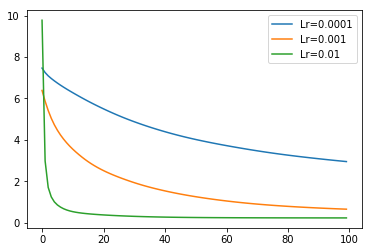

In [39]:
lr = [0.0001,0.001,0.01]
num_iterations = 10000
print_cost = False
plot_lr(X_train,y_train,X_test,y_test,num_iterations,lr,print_cost)

##### 4.2 Observe the effect of iteration_num on the test accuracy.

In [43]:
import matplotlib.pyplot as plt
def plot_acc(X_train,Y_train,X_test,Y_test,num_iterations,learning_rate,print_cost):
    iters=[]
    train_accs=[]
    test_accs=[]
    for i in range(1,num_iterations+1):
        if i%50 == 0:
            r = model(X_train, Y_train, X_test, Y_test, i ,learning_rate,print_cost)
            iters.append(r["num_itr"])
            train_accs.append(r["tr_acc"])
            test_accs.append(r["te_acc"])
    plt.plot(range(len(test_accs)),test_accs,label="Test_acc")
    plt.plot(range(len(train_accs)),train_accs,label="Train_acc")
    plt.legend(loc='upper right')
    plt.show()

train_acc=0.5509,test_accuracy=0.5200
train_acc=0.6964,test_accuracy=0.7178
train_acc=0.7810,test_accuracy=0.7689
train_acc=0.7506,test_accuracy=0.7622
train_acc=0.7914,test_accuracy=0.7911
train_acc=0.8203,test_accuracy=0.8067
train_acc=0.8255,test_accuracy=0.8156
train_acc=0.8463,test_accuracy=0.8289
train_acc=0.8285,test_accuracy=0.8267
train_acc=0.8708,test_accuracy=0.8244
train_acc=0.8441,test_accuracy=0.8178
train_acc=0.8582,test_accuracy=0.8467
train_acc=0.8560,test_accuracy=0.8556
train_acc=0.8589,test_accuracy=0.8578
train_acc=0.8545,test_accuracy=0.8467
train_acc=0.8641,test_accuracy=0.8533
train_acc=0.8745,test_accuracy=0.8533
train_acc=0.8656,test_accuracy=0.8333
train_acc=0.8612,test_accuracy=0.8578
train_acc=0.8649,test_accuracy=0.8667
train_acc=0.8924,test_accuracy=0.8600
train_acc=0.8790,test_accuracy=0.8533
train_acc=0.8768,test_accuracy=0.8533
train_acc=0.8760,test_accuracy=0.8556
train_acc=0.8961,test_accuracy=0.8711
train_acc=0.8782,test_accuracy=0.8622
train_acc=0.

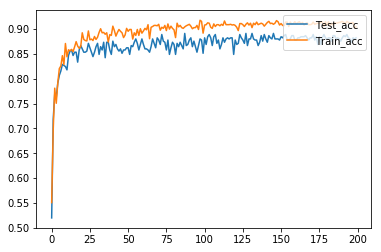

In [45]:
num_iterations=10000
learning_rate = 0.01
print_cost=False
plot_acc(X_train,y_train,X_test,y_test,num_iterations,learning_rate,print_cost)

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

<font color='purple'>**[1]底层搭建**

In [26]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import matplotlib.pyplot as plt

**Step1:Load data**

In [3]:
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

#preprocessing
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [4]:
y_train.shape

(1347, 10)

In [5]:
y_test.shape

(450, 10)

**Step2:Algorithm**

**2.1 Activation function**

In [16]:
import numpy as np
def softmax(z,axis=1):
    """
    Compute softmax of z
    Arguments:
    z -- a vector or a matrix
    Return: softmax of z 
    """
    #matrix
    if len(z.shape) > 1:
        z_max = np.max(z,axis) #求每行最大值
        z -= z_max.reshape((z.shape[0],1))
        z = np.exp(z)
        z_sum = np.sum(z,axis) #求每行的和
        z /= z_sum.reshape((z.shape[0],1))
    #vector
    else:
        z_max = np.max(z)
        z -= z_max
        z = np.exp(z)
        z_sum = np.sum(z)
        z /= z_sum
    return z

In [17]:
#test
z=np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])
softmax(z)

array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])

**2.2 Initialization**

In [18]:
def initialize_parameters(dim,num_class):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,num_class)
    b -- initializaed verctor of shape(1,num_class)
    '''
    
    w = np.random.randn(dim,num_class)
    b = np.zeros((1,num_class))
    return w,b

In [19]:
#Test
w,b = initialize_parameters(64,10)
np.dot(X_train,w).T.shape

(10, 1347)

**2.3：Forward and backward propagation**

Forward Propagation:   
. X    
. $A = \sigma(W^T*X+\underline{b}) )$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}\sum_{j=1}^{c}y_{ij}*log a_{ij}$    

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$ 
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

In [20]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights of shape(dim,num_class)
    b - bias of shape(1,num_class)
    X - data of shape(m,dim)
    Y - ground truth of shape(m,num_class)
    '''
    m = X.shape[0] 
    A = softmax(np.dot(X,w)+b)
    assert(A.shape == Y.shape)

    cost = -np.sum(Y*np.log(A+ pow(10.0, -9)))/m
    dw = (1/m)*np.dot(X.T,A-Y) 
    db = np.mean(A-Y,axis=0)
    #print('db:',db)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

**2.4 Optimization**

In [21]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

**2.5 Prediction**

In [22]:
def predict(w, b, X,num_class):
    '''
    Predict the label belonging to 0-9 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    num_class -- the number of classes
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions for the examples in X
    '''
    m,dim = X.shape
    Y_prediction = np.zeros((1,m))
    w = w.reshape(dim,num_class)
    
    A = softmax(np.dot(X,w)+b)
    Y_prediction = np.argmax(A,axis=1)
    assert(Y_prediction.shape == (m,))
    
    return Y_prediction

**Step3:Model**

In [23]:
from sklearn.utils import shuffle,resample
def model(X_train, Y_train, X_test, Y_test, num_class,num_iterations, learning_rate,print_cost=True):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label using one-hot coding
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    #parameters initialization
    row,col = X_train.shape
    w,b = initialize_parameters(col,num_class)
    #training
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    #train_accuracy
    Y_train_predict = predict(params['w'], params['b'], X_train,num_class)
    Y_train = np.argmax(Y_train,axis=1)
    n = sum(Y_train_predict==Y_train)
    train_acc = float(n/Y_train.shape[0])
    #test_accuracy
    Y_test_predict = predict(params['w'], params['b'], X_test,num_class)
    Y_test = np.argmax(Y_test,axis=1)
    n = sum(Y_test_predict==Y_test)
    test_acc = float(n/Y_test.shape[0])
    print("train_acc={:.4f},test_accuracy={:.4f}".format(train_acc,test_acc))
    #results
    result = {
        "costs":costs,
        "lr":learning_rate,
        "num_itr":num_iterations,
        "tr_acc":train_acc,
        "te_acc":test_acc
    }
    return result

In [29]:
r = model(X_train, y_train, X_test, y_test, num_class=10, num_iterations=10000, learning_rate=0.01,print_cost=True)

Cost after iteration 0: 18.410219
Cost after iteration 100: 8.748535
Cost after iteration 200: 3.788862
Cost after iteration 300: 2.478121
Cost after iteration 400: 1.883418
Cost after iteration 500: 1.493932
Cost after iteration 600: 1.223285
Cost after iteration 700: 1.042322
Cost after iteration 800: 0.919674
Cost after iteration 900: 0.823344
Cost after iteration 1000: 0.743634
Cost after iteration 1100: 0.679778
Cost after iteration 1200: 0.628847
Cost after iteration 1300: 0.586444
Cost after iteration 1400: 0.549741
Cost after iteration 1500: 0.517278
Cost after iteration 1600: 0.487795
Cost after iteration 1700: 0.460075
Cost after iteration 1800: 0.434191
Cost after iteration 1900: 0.410984
Cost after iteration 2000: 0.390487
Cost after iteration 2100: 0.371920
Cost after iteration 2200: 0.354560
Cost after iteration 2300: 0.338262
Cost after iteration 2400: 0.322922
Cost after iteration 2500: 0.308256
Cost after iteration 2600: 0.294033
Cost after iteration 2700: 0.280130
Cos

**Step4：plot**

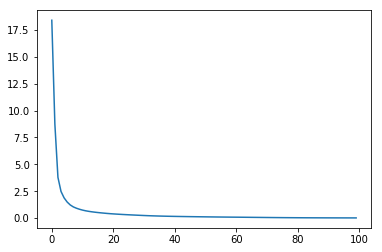

In [30]:
 plt.plot(range(len(r["costs"])),r["costs"])

<font color='purple'>**[2]直接利用MLPClassifier搭建model**

**Step1:Load data**

In [157]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [158]:
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [159]:
print(X_train.shape)

(1347, 64)


In [160]:
print(y_train.shape)

(1347,)


**Step2:Design a Model**

MLP参数：<br>
https://blog.csdn.net/Mrzhang0419/article/details/79519994 中文


In [161]:
from sklearn.neural_network import MLPClassifier

In [162]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50),activation='relu',alpha=1e-4,solver='sgd',random_state=1,verbose=True)

**Step3:Training the Model**

In [163]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 6.21076833
Iteration 2, loss = 2.46443285
Iteration 3, loss = 1.69394416
Iteration 4, loss = 1.30788175
Iteration 5, loss = 1.05166964
Iteration 6, loss = 0.86288801
Iteration 7, loss = 0.72723618
Iteration 8, loss = 0.62607120
Iteration 9, loss = 0.54986028
Iteration 10, loss = 0.48639324
Iteration 11, loss = 0.43564168
Iteration 12, loss = 0.39202217
Iteration 13, loss = 0.35750066
Iteration 14, loss = 0.32762891
Iteration 15, loss = 0.30205140
Iteration 16, loss = 0.28010271
Iteration 17, loss = 0.26063958
Iteration 18, loss = 0.24445187
Iteration 19, loss = 0.22961754
Iteration 20, loss = 0.21715324
Iteration 21, loss = 0.20595775
Iteration 22, loss = 0.19473211
Iteration 23, loss = 0.18574755
Iteration 24, loss = 0.17738243
Iteration 25, loss = 0.17013057
Iteration 26, loss = 0.16397285
Iteration 27, loss = 0.15775600
Iteration 28, loss = 0.15138216
Iteration 29, loss = 0.14577517
Iteration 30, loss = 0.14066062
Iteration 31, loss = 0.13717291
Iteration 32, los

d:\program files\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [164]:
mlp.out_activation_ #输出函数

'softmax'

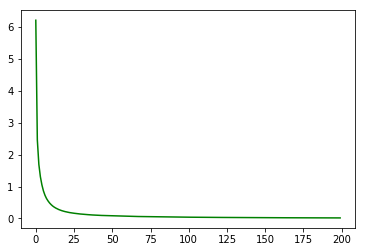

In [165]:
losses = mlp.loss_curve_
plt.plot(range(len(losses)),losses,color='g')

**Step3:predict and calculate accuracy**

In [166]:
def predict(model,x_train,y_train,x_test,y_test):
    pred_train = model.predict(x_train)
    acc_train = sum(pred_train==y_train)/len(y_train)
    print("acc_train=",acc_train)
    pred_test = model.predict(x_test)
    acc_test = sum(pred_test==y_test)/len(y_test)
    print("acc_test=",acc_test)
    return acc_train,acc_test

In [167]:
predict(mlp,X_train,y_train,X_test,y_test)

acc_train= 0.9992576095025983
acc_test= 0.9644444444444444


(0.9992576095025983, 0.9644444444444444)

# Congratulations ! You have completed assigment 4. 